<a href="https://colab.research.google.com/github/restrepo/WIMP/blob/master/WIMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dark Matter Boltzmann equation

This program is made to reproduce the behavior of dark matter yield in WIMP and FIMP frameworks based on Chapter 5th, Kolb Turner (Early Universe) and https://arxiv.org/pdf/1009.3690.pdf

See also
* https://arxiv.org/pdf/1703.07364.pdf
* [DM book](https://drive.google.com/file/d/1YVMIrldAAWWDYuMEDc6dKLS4g-13bC1d/view?usp=sharing)

In [3]:
%pylab inline  
import numpy as np
from numpy import arange
from scipy.integrate import odeint

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Expected cross sections

From: [1] https://arxiv.org/pdf/1009.3690.pdf

$$
\Omega h^{2} \approx \frac{3 \times 10^{-27} \mathrm{~cm}^{3} / \mathrm{s}}{\left\langle\sigma_{\mathrm{ann}} v\right\rangle}
$$

* [$1\text{ cm}=5.068\times 10^{13} \hbar c\cdot\text{GeV}^{-1} $](https://www.wolframalpha.com/input?i=1cm+to+hbar*c/GeV)
* [$1\text{ s}=1.519\times 10^{24} \hbar \cdot\text{GeV}^{-1} $](https://www.wolframalpha.com/input?i=1s+to+hbar/GeV)
* [$0.1\text{ pb}\approx 2.6\times 10^{-10}\, \hbar c\cdot \text{GeV}^{-2}$](https://www.wolframalpha.com/input?i=2.6*10^{-10}GeV^{-2}(hbar*c)**2+to+picobarn)

$$
\langle\sigma v \rangle= 3\times 10^{-27}\frac{(5.068\times 10^{13} \hbar c\cdot\text{GeV}^{1})^3}{1.519\times 10^{24}\hbar\cdot\text{GeV}^{-1}}
$$

In [923]:
3E-27*(5.068E13)**3/1.519E24

2.5708296464516136e-10

$$\langle\sigma v \rangle=2.6\times 10^{-10}(\hbar c)^2\text{GeV}^{-2}c$$

In [924]:
2.6E-10*3E10

7.8

$$\langle\sigma v \rangle=7.8\times (\hbar c)^2\text{GeV}^{-2}\frac{\text{cm}}{\text{s}}$$

Electroweak cross section are of order of pb
$$
\sigma\sim \frac{\langle\sigma v\rangle}{c}=2.6\times 10^{-10}(\hbar c)^2\text{GeV}^{-2}
=0.1\text{ pb}
$$

## Expected abundances

https://pdg.lbl.gov/2012/reviews/rpp2012-rev-astrophysical-constants.pdf
* $h=0.71$
* $\rho_c^0=1.05375(13) \times 10^{-5} h^{2}\left(\mathrm{GeV} / c^{2}\right) \mathrm{cm}^{-3} $

From eq. (7.11) https://arxiv.org/pdf/1009.3690.pdf
$$ \Omega_{\chi} h^{2}=\frac{\rho_{\chi}^{0} h^{2}}{\rho_{c}^{0}}=\frac{m_{\chi} s_{0} Y_{0} h^{2}}{\rho_{c}^{0}}$$

From https://arxiv.org/pdf/hep-ph/0501232.pdf

$$
s_0=\left(2 \pi^{2} / 45\right) h_{\mathrm{eff}}\left(T_{\gamma}\right) T_{\gamma}^{3}
$$
* $h_{\mathrm{eff}}(T_\gamma)=3.9172$
* $T_\gamma=2.725 K$[$=2.4\times 10^{-13}\text{ GeV}/k_B$](https://www.wolframalpha.com/input?i=2.725+K+to+GeV/k)$=2.4\times 10^{-13}\cdot 5.068\times 10^{13}\hbar c/(k_B\text{cm})=
12.2\,\hbar c/(k_B\text{cm})$

In [927]:
(2*np.pi**2/45)*3.9172*(12.2)**3

3120.128389914731

$$s_0\approx 3120\text{ cm}^3$$

$$\frac{s_0 h^2}{\rho_c^0}=\frac{3120\cdot 0.71^2}{1.05375\times 10^{-5}}\approx 1.5\times 10^8$$

In [992]:
3120*0.71**2/1.05375E-5

149256654.80427045

So that

$$ \Omega_{\chi} h^{2}=1.5\times 10^8  m_{\chi}  Y_{0} (c^2/ \text{GeV})=1.5\times 10^{10} Y_0 \left(\frac{m_\chi}{100\text{ GeV/}c^2}\right) $$

To obtain
$$ \Omega_{\chi} h^{2}=0.118$$
we require the adimensional quantity

In [943]:
Y0=0.118/1.5E10
Y0

7.866666666666666e-12

$$Y_0=8\times 10^{-12}\left(\frac{100\text{ GeV}/c^2}{m_\chi}\right)\sim 10^{-11}\left(\frac{100\text{ GeV}/c^2}{m_\chi}\right) $$

## Expected result
From [1]

![image](./Y.png)

## Numerical calculation

We use eq. (7.10) of https://arxiv.org/pdf/1009.3690.pdf
$$
\frac{d Y}{d x}=-\left(\frac{45}{\pi M_{P}^{2}}\right)^{-1 / 2} \frac{g_{*}^{1 / 2} m}{x^{2}}\langle\sigma v\rangle\left(Y^{2}-Y_{\text{eq}}^{2}\right)
$$

The equilibrium distribution of this particles is consider for the non-relativistic case, as follows (see Kolb & Turner eq 5.25):

$$Y_{\text{eq}}(x) = \frac{45}{2\pi^{4}}\frac{g}{g_{*s}} x^{3/2} e^{-x} = 0.145\frac{g}{g_{*s}} x^{3/2} e^{-x}\,, $$

where $x = M / T$ and $M= 100$ GeV is the singlet mass taken as constant.

In [591]:
# parameters
M = 100                                #GeV Singlet Mass
Mp = 1.22e19                            #GeV Planck Mass

In [592]:
import pandas as pd

From fig. 1 https://arxiv.org/pdf/hep-ph/0501232.pdf

In [944]:
dfg=pd.DataFrame([
    {'T':1E-1,'geff_to_half':4.2},
    {'T':1,'geff_to_half':8.7},
    {'T':100,'geff_to_half':10.2}
    ])

In [945]:
from scipy import optimize

In [946]:
f=lambda T,a,b,c:a/(1+np.exp(-b*(T-c)))

In [974]:
B,σ=optimize.curve_fit(f,dfg['T'],dfg['geff_to_half'],p0=(0,0,0))

/usr/local/lib/python3.9/dist-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [975]:
gs_to_half= lambda T: f(T,a=B[0],b=B[1],c=B[2])

Text(0, 0.5, '$g_*^{1/2}$')

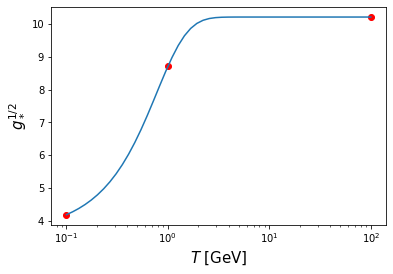

In [976]:
T=np.logspace(np.log10(1E-1),np.log10(100))
plt.semilogx(dfg['T'],dfg['geff_to_half'],'ro')
plt.plot(T,gs_to_half(T) )
plt.xlabel('$T$ [GeV]',size=15)
plt.ylabel(r'$g_*^{1/2}$',size=15)

In [977]:
from scipy import misc

In [985]:
m=100;Mp=1.22e19

In [986]:
global k
k=1
fk=lambda σv:np.sqrt(np.pi*Mp**2/45)*m*σv
def BEx(x,m=100):
    T=m/x
    return k*gs_to_half(T)/x**2
def Yeq(x):
    return 0.145*x**(3/2)*np.exp(-x)

In [987]:
def BE(Y,x):
    return -(Y**2-Yeq(x)**2)*BEx(x)

In [990]:
from scipy import integrate

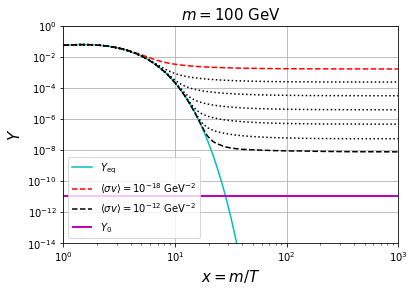

In [991]:
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Yeq(xx),'c',label=r'$Y_{\rm eq}$')

k=fk(σv=1E-18)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'r--',label=r'$\langle \sigma v \rangle = 10^{-18}\ {\rm GeV}^{-2}$')
k=fk(σv=1E-17)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')
k=fk(σv=1E-16)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')
k=fk(σv=1E-15)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')
k=fk(σv=1E-14)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')
k=fk(σv=1E-13)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')
k=fk(σv=1E-12)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k--',
          label=r'$\langle \sigma v \rangle = 10^{-12}\ {\rm GeV}^{-2}$')
plt.hlines(1E-11,1,1000,linestyles='-',color='m',lw=2,label='$Y_0$')
plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()

The required $Y_0$ seem to imply
$$
\langle \sigma v \rangle = 10^{-8}(\hbar c)^2\text{GeV}^{-2}c
$$
instead of $2.7\times 10^{-10}(\hbar c)^2\text{GeV}^{-2}c$